# House Price Prediction

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import xticks

import warnings
warnings.filterwarnings('ignore')

from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import RFE
pd.pandas.set_option('display.max_columns', None)

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline


from scipy.stats import norm
from scipy import stats

%matplotlib inline

# Data Analysis & EDA

In [2]:
# load the dataset
house = pd.read_csv("train.csv")
house.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
house.shape

(1460, 81)

In [4]:
house.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

######  Wohooo!!! 81 features!! This dataset would surely require lots of data analysis!!!

In [4]:
# check the dataset
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

**As we can see there are lots of null values present in the dataset, we will check them in detail while performing Data Analysis and EDA.**

### "SalePrice" is the target variable, lets see how it looks like!!

In [5]:
# lets check the target variable "SalePrice"
house["SalePrice"].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

**Great!! There are no negative values in the dataset for sale price which is good**

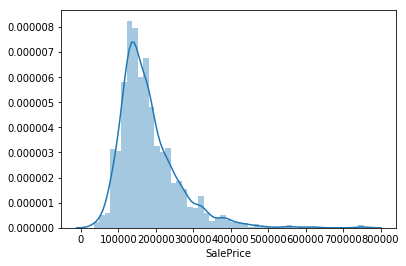

In [6]:
# lets check the distribution of saleprice
sns.distplot(house.SalePrice)

In [5]:
#skewness and kurtosis
print("Skewness: %f" % house['SalePrice'].skew())
print("Kurtosis: %f" % house['SalePrice'].kurt())

Skewness: 1.882876
Kurtosis: 6.536282


**Saleprice seems to be skewed, This need to be handled else this will adversly impact our model**

### Relationship with numerical variables

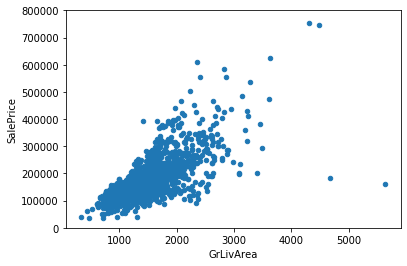

In [6]:
#scatter plot grlivarea/saleprice
var = 'GrLivArea'
data = pd.concat([house['SalePrice'], house[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

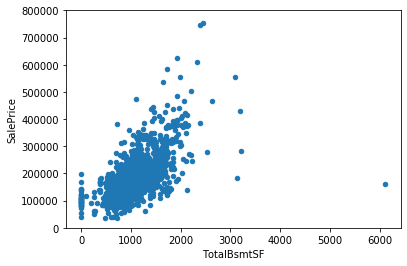

In [7]:
#scatter plot totalbsmtsf/saleprice
var = 'TotalBsmtSF'
data = pd.concat([house['SalePrice'], house[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

#### The 'SalePrice' and 'GrLivArea' are with a linear relationship. 'TotalBsmtSF' is also have a relationship with 'SalePrice' but this in a strong linear (exponential?)

### Relationship with categorical features

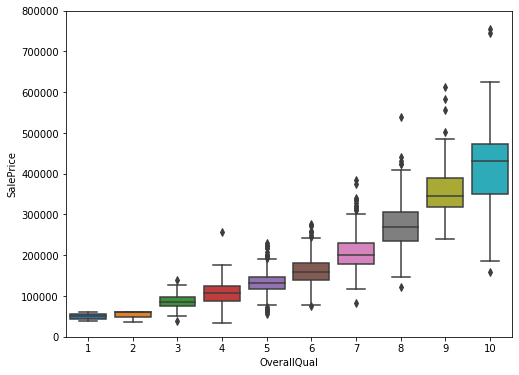

In [8]:
#box plot overallqual/saleprice
var = 'OverallQual'
data = pd.concat([house['SalePrice'], house[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);

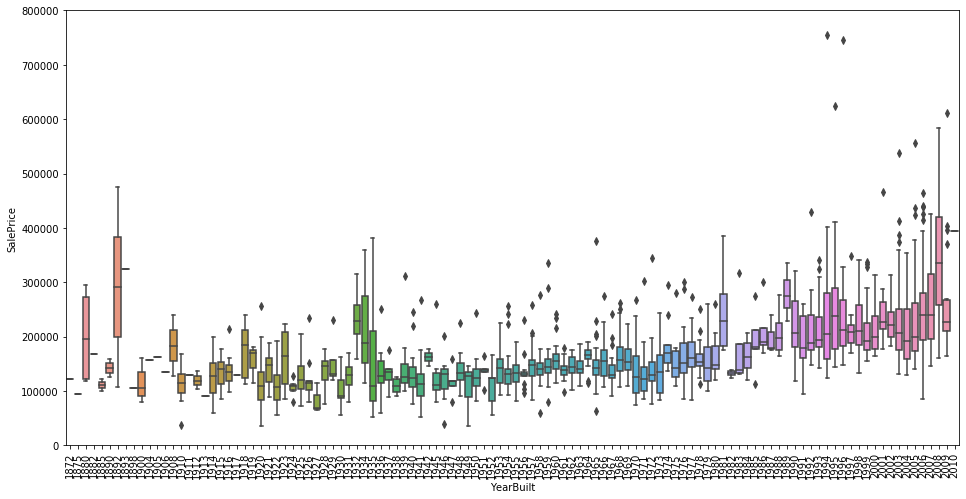

In [9]:
var = 'YearBuilt'
data = pd.concat([house['SalePrice'], house[var]], axis=1)
f, ax = plt.subplots(figsize=(16, 8))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);
plt.xticks(rotation=90);

* 'GrLivArea' and 'TotalBsmtSF' seem to be linearly related with 'SalePrice'. Both relationships are positive, which means that as one variable increases, the other also increases. In the case of 'TotalBsmtSF', we can see that the slope of the linear relationship is particularly high.
* 'OverallQual' and 'YearBuilt' also seem to be related with 'SalePrice'. The relationship seems to be stronger in the case of 'OverallQual', where the box plot shows how sales prices increase with the overall quality.

### Correlation matrix (heatmap style)

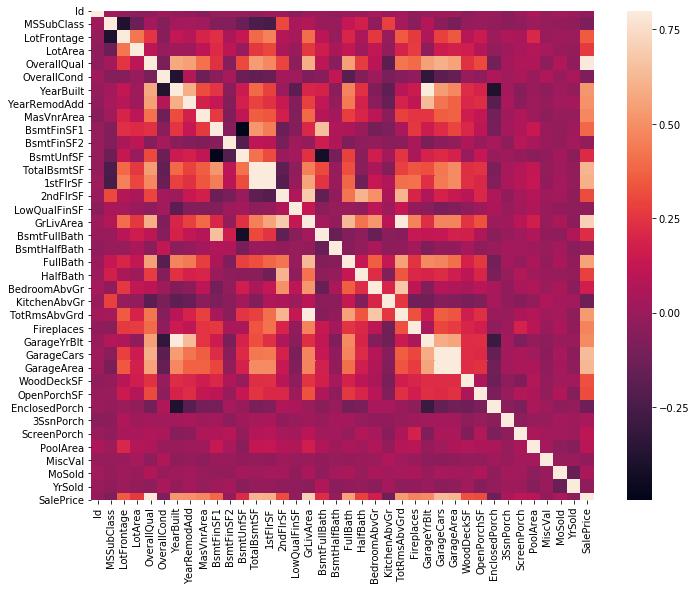

In [10]:
#correlation matrix
corrmat = house.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

#### 'SalePrice' correlation matrix (zoomed heatmap style)

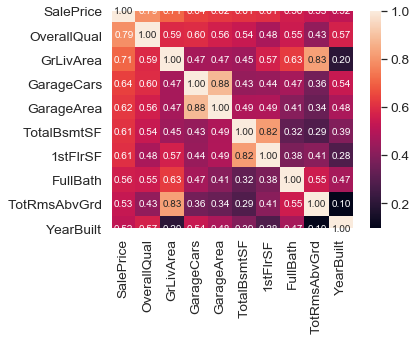

In [11]:
#saleprice correlation matrix
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(house[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

#### Scatter plots between 'SalePrice' and correlated variable

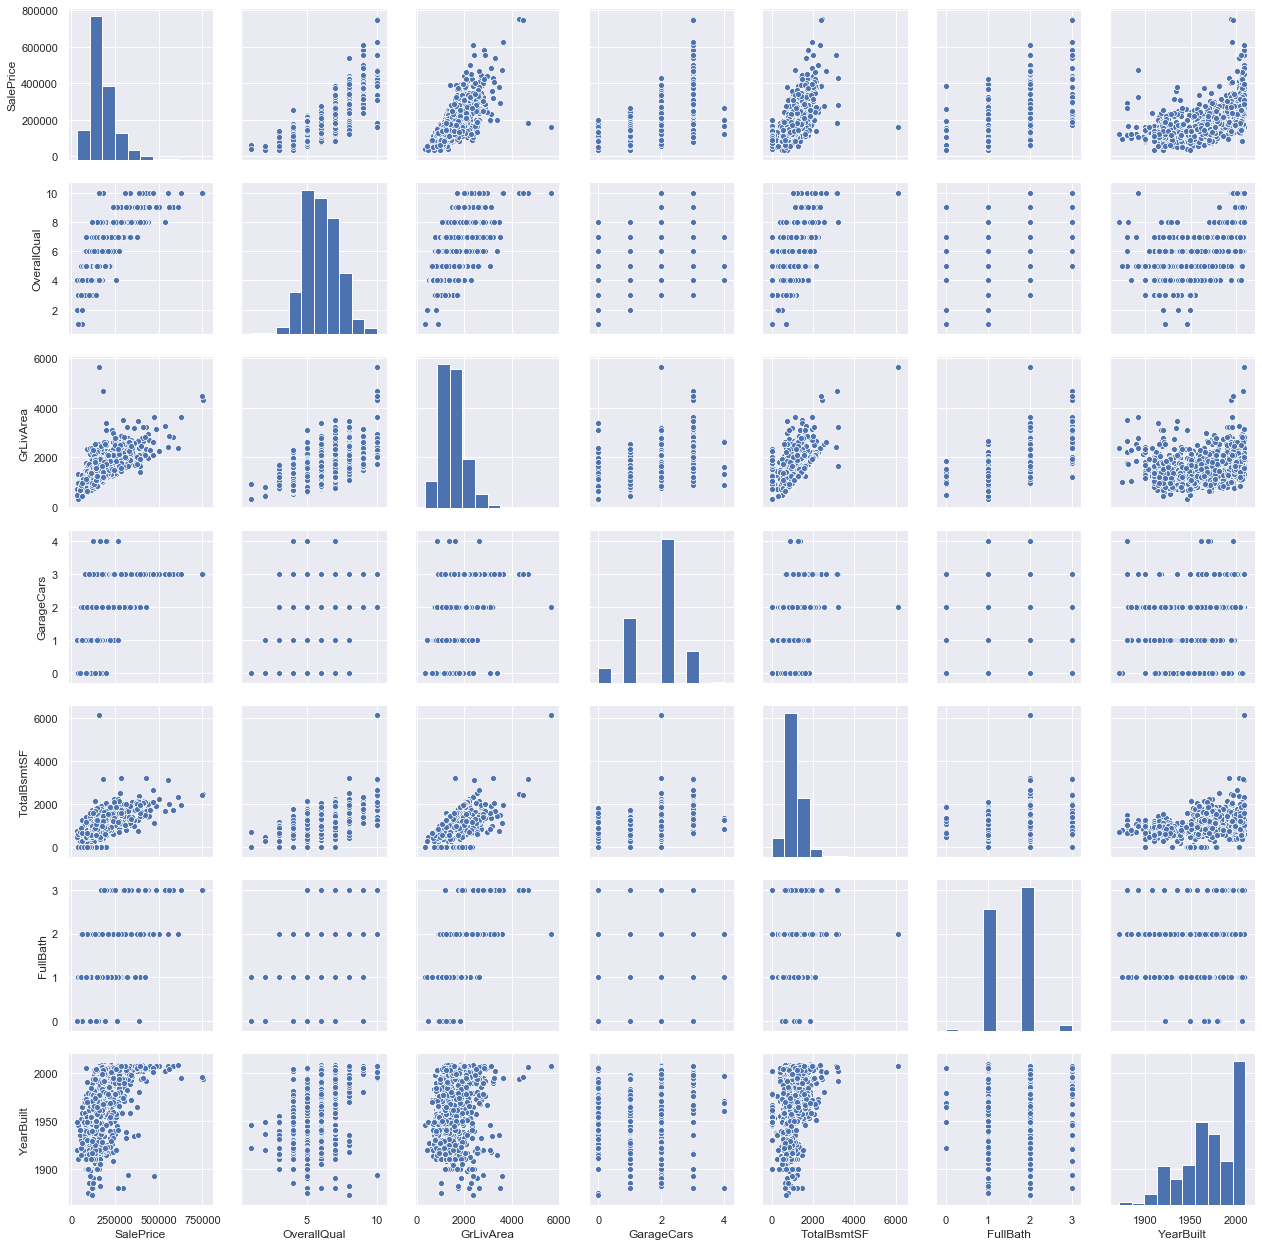

In [12]:
#scatterplot
sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(house[cols], size = 2.5)
plt.show();

# Dealing with missing data

In [13]:
#missing data
total = house.isnull().sum().sort_values(ascending=False)
percent = (house.isnull().sum()/house.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageCond,81,0.055479
GarageType,81,0.055479
GarageYrBlt,81,0.055479
GarageFinish,81,0.055479


In [14]:
# lets drop Id because its of no use to us
house.drop("Id",1,inplace = True)

In [15]:
# Let's display the variables with more than 0 null values
null_cols = []
for col in house.columns:
    if house[col].isnull().sum() > 0 :
        print("Column",col, "has", house[col].isnull().sum(),"null values")    
        null_cols.append(col)

Column LotFrontage has 259 null values
Column Alley has 1369 null values
Column MasVnrType has 8 null values
Column MasVnrArea has 8 null values
Column BsmtQual has 37 null values
Column BsmtCond has 37 null values
Column BsmtExposure has 38 null values
Column BsmtFinType1 has 37 null values
Column BsmtFinType2 has 38 null values
Column Electrical has 1 null values
Column FireplaceQu has 690 null values
Column GarageType has 81 null values
Column GarageYrBlt has 81 null values
Column GarageFinish has 81 null values
Column GarageQual has 81 null values
Column GarageCond has 81 null values
Column PoolQC has 1453 null values
Column Fence has 1179 null values
Column MiscFeature has 1406 null values


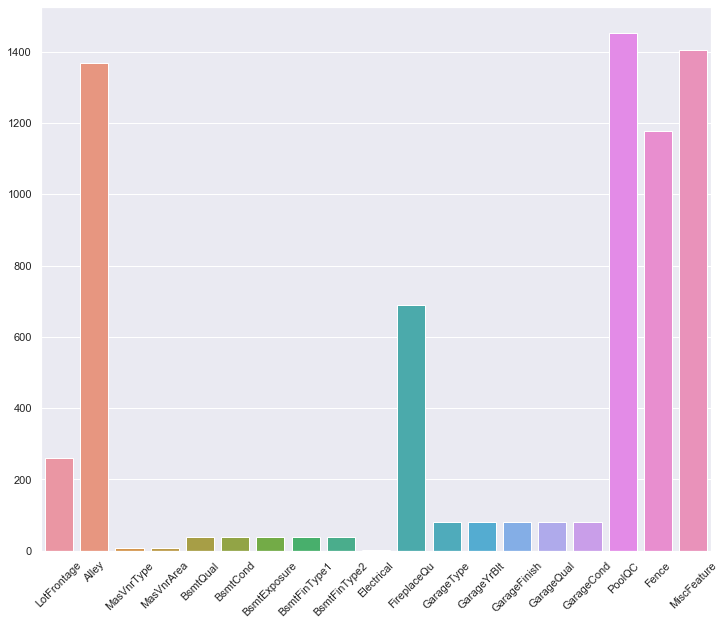

In [16]:
# lets visualize the null vaues
plt.figure(figsize=(12,10))
sns.barplot(x=house[null_cols].isnull().sum().index, y=house[null_cols].isnull().sum().values)
xticks(rotation=45)
plt.show()

**So many Null Values!!!**

**Let's take a look at the data dictionary, these are not actually the null values, rather these are the features which are not present in the house.**

**For example, let check the field Alley, Value "NA: here means house has "No Alley Access"**

**We will handle these null values in a while, till then chill :)**

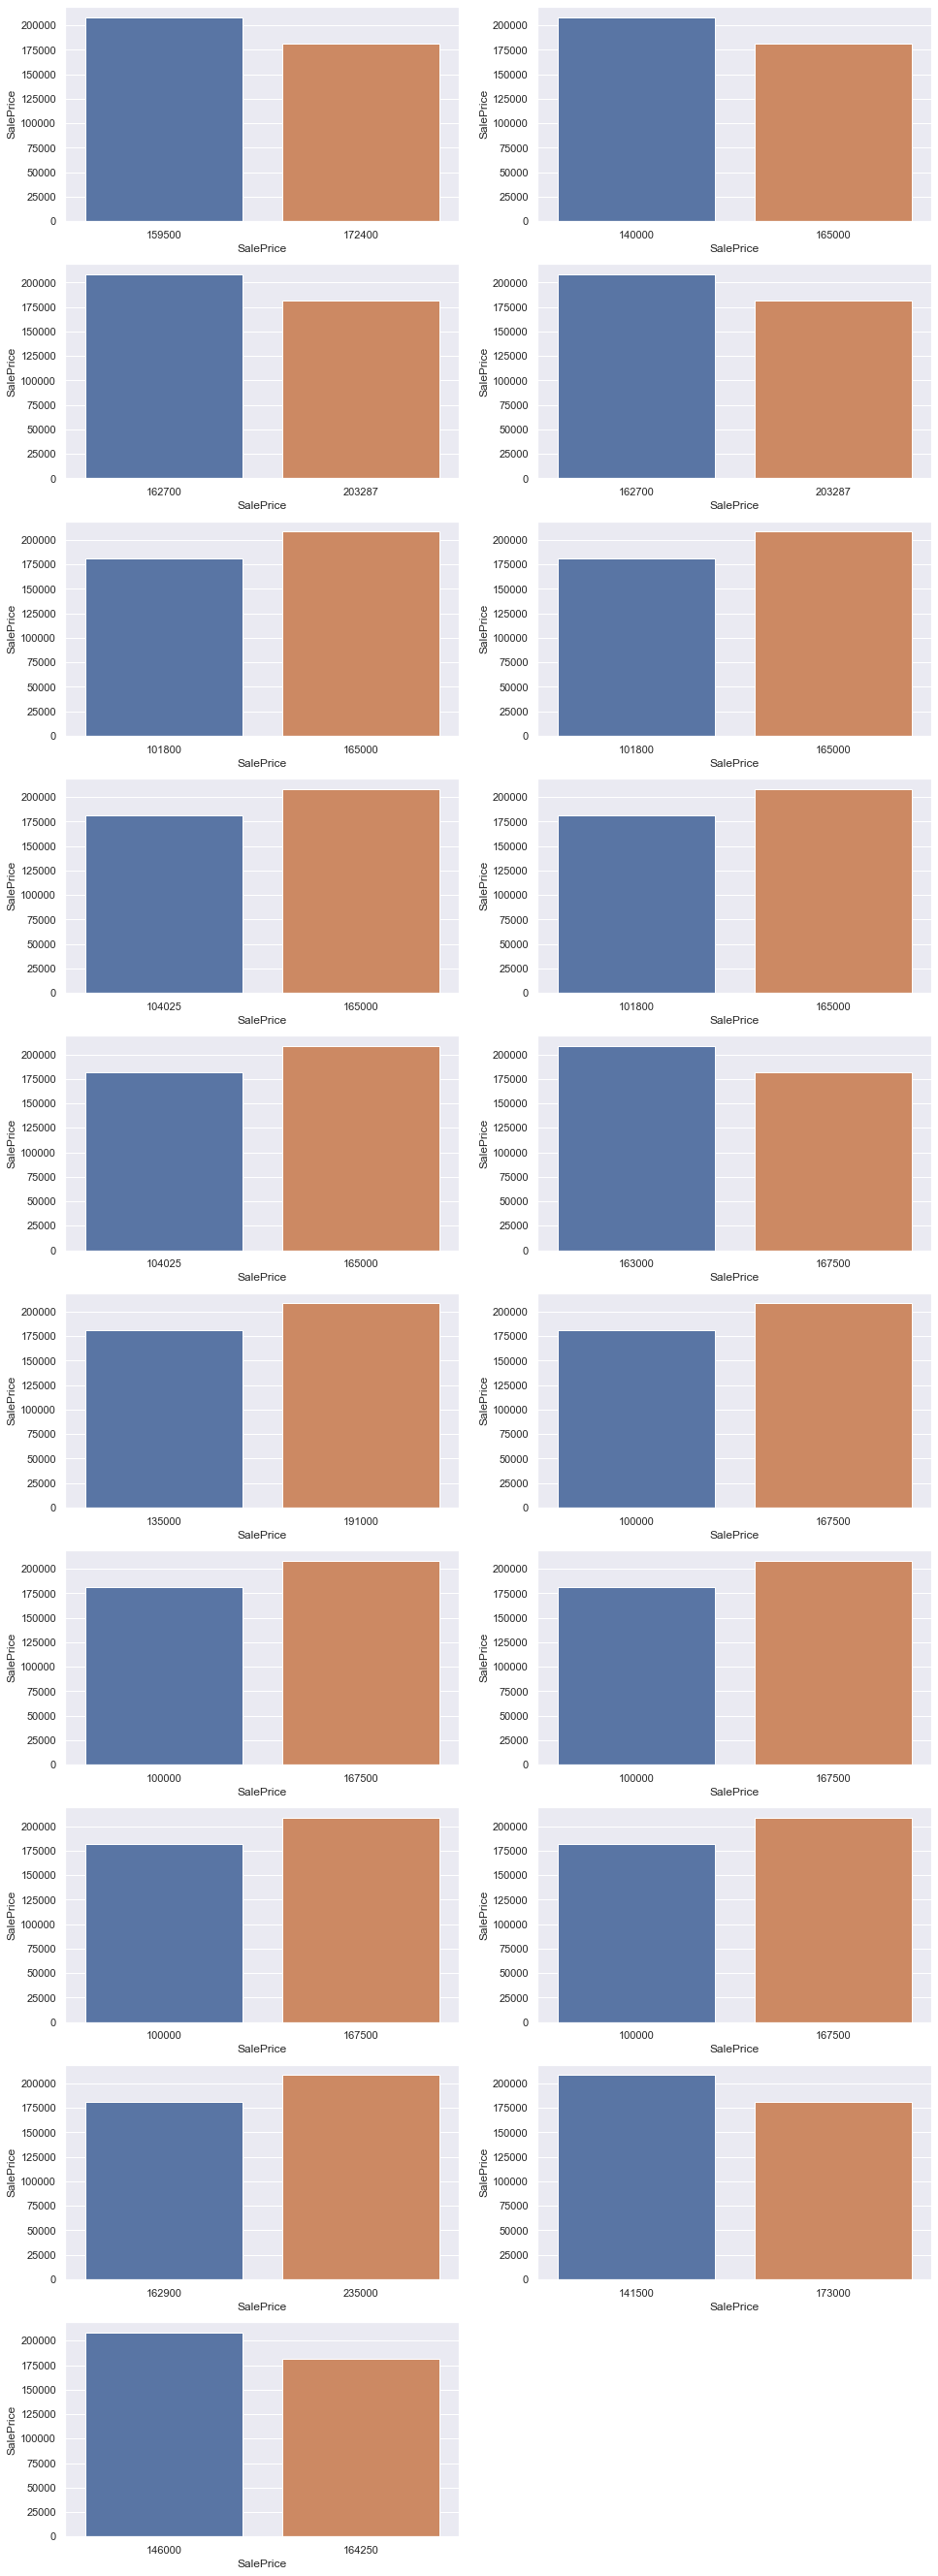

In [17]:
# lets check if these null values actually have any relation with the target variable

house_eda = house.copy()

for col in null_cols:
    house_eda[col] = np.where(house_eda[col].isnull(), 1, 0)  

# lets see if these null values have to do anything with the sales price
plt.figure(figsize = (16,48))
for idx,col in enumerate(null_cols):
    plt.subplot(10,2,idx+1)
    sns.barplot(x = house_eda.groupby(col)["SalePrice"].median(),y =house_eda["SalePrice"])
plt.show()

**From the above graphs, we can clearly see that the null values have strong relation with the SalePrice, hence we can niether drop the columns with null values, nor we can drop the rows with null values.**

**There are some Date Variables in the dataset when we performed df.head(),Let's check again**

In [18]:
# making list of date variables
yr_vars = []
for col in house.columns:
    if "Yr" in col or "Year" in col:
        yr_vars.append(col)

yr_vars = set(yr_vars)
yr_vars

{'GarageYrBlt', 'YearBuilt', 'YearRemodAdd', 'YrSold'}

**Let's check relation of these fields with the target variable**

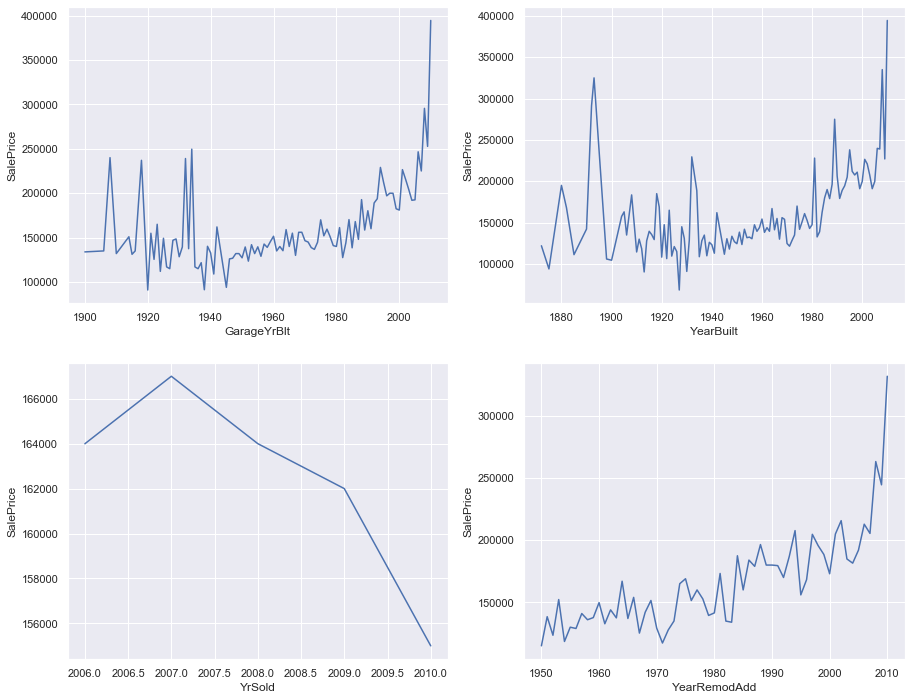

In [19]:
plt.figure(figsize = (15,12))
for idx,col in enumerate(yr_vars):
    plt.subplot(2,2,idx+1)
    plt.plot(house.groupby(col)["SalePrice"].median())
    plt.xlabel(col)
    plt.ylabel("SalePrice")

**Make a note of the trend of sale price with the field "YrSold", it shows a decreasing trend which seems unreal in real state scenario, price is expected to increase as the time passes by, but here it shows opposite. Does it look right? can we do anything about it? Yes, We can Surely do!! Let's create "Age" variables out of these "Year" variables**

**Let's check variations or different values present in the columns, we will start by seperating two seperate lists, one for categorical variabels and another one for numeric variables**

In [20]:
# lets create seperate lists of categorical and numeric columns
cat_vars = []
num_vars = []
for col in house.columns.drop("SalePrice"):
    if house[col].dtypes == 'O':
        cat_vars.append(col)
    else:
        num_vars.append(col)

#lets check the lists created.
print("List of Numeric Columns:",num_vars)
print("\n")
print("List of Categorical Columns:",cat_vars)

List of Numeric Columns: ['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold']


List of Categorical Columns: ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu'

In [21]:
# Let's further seperate the numeric features into continous and discrete numeric features
num_cont = []
num_disc = []
for col in num_vars:
    if house[col].nunique() > 25: # if variable has more than 25 different values, we consider it as continous variable
        num_cont.append(col)
    else:
        num_disc.append(col)

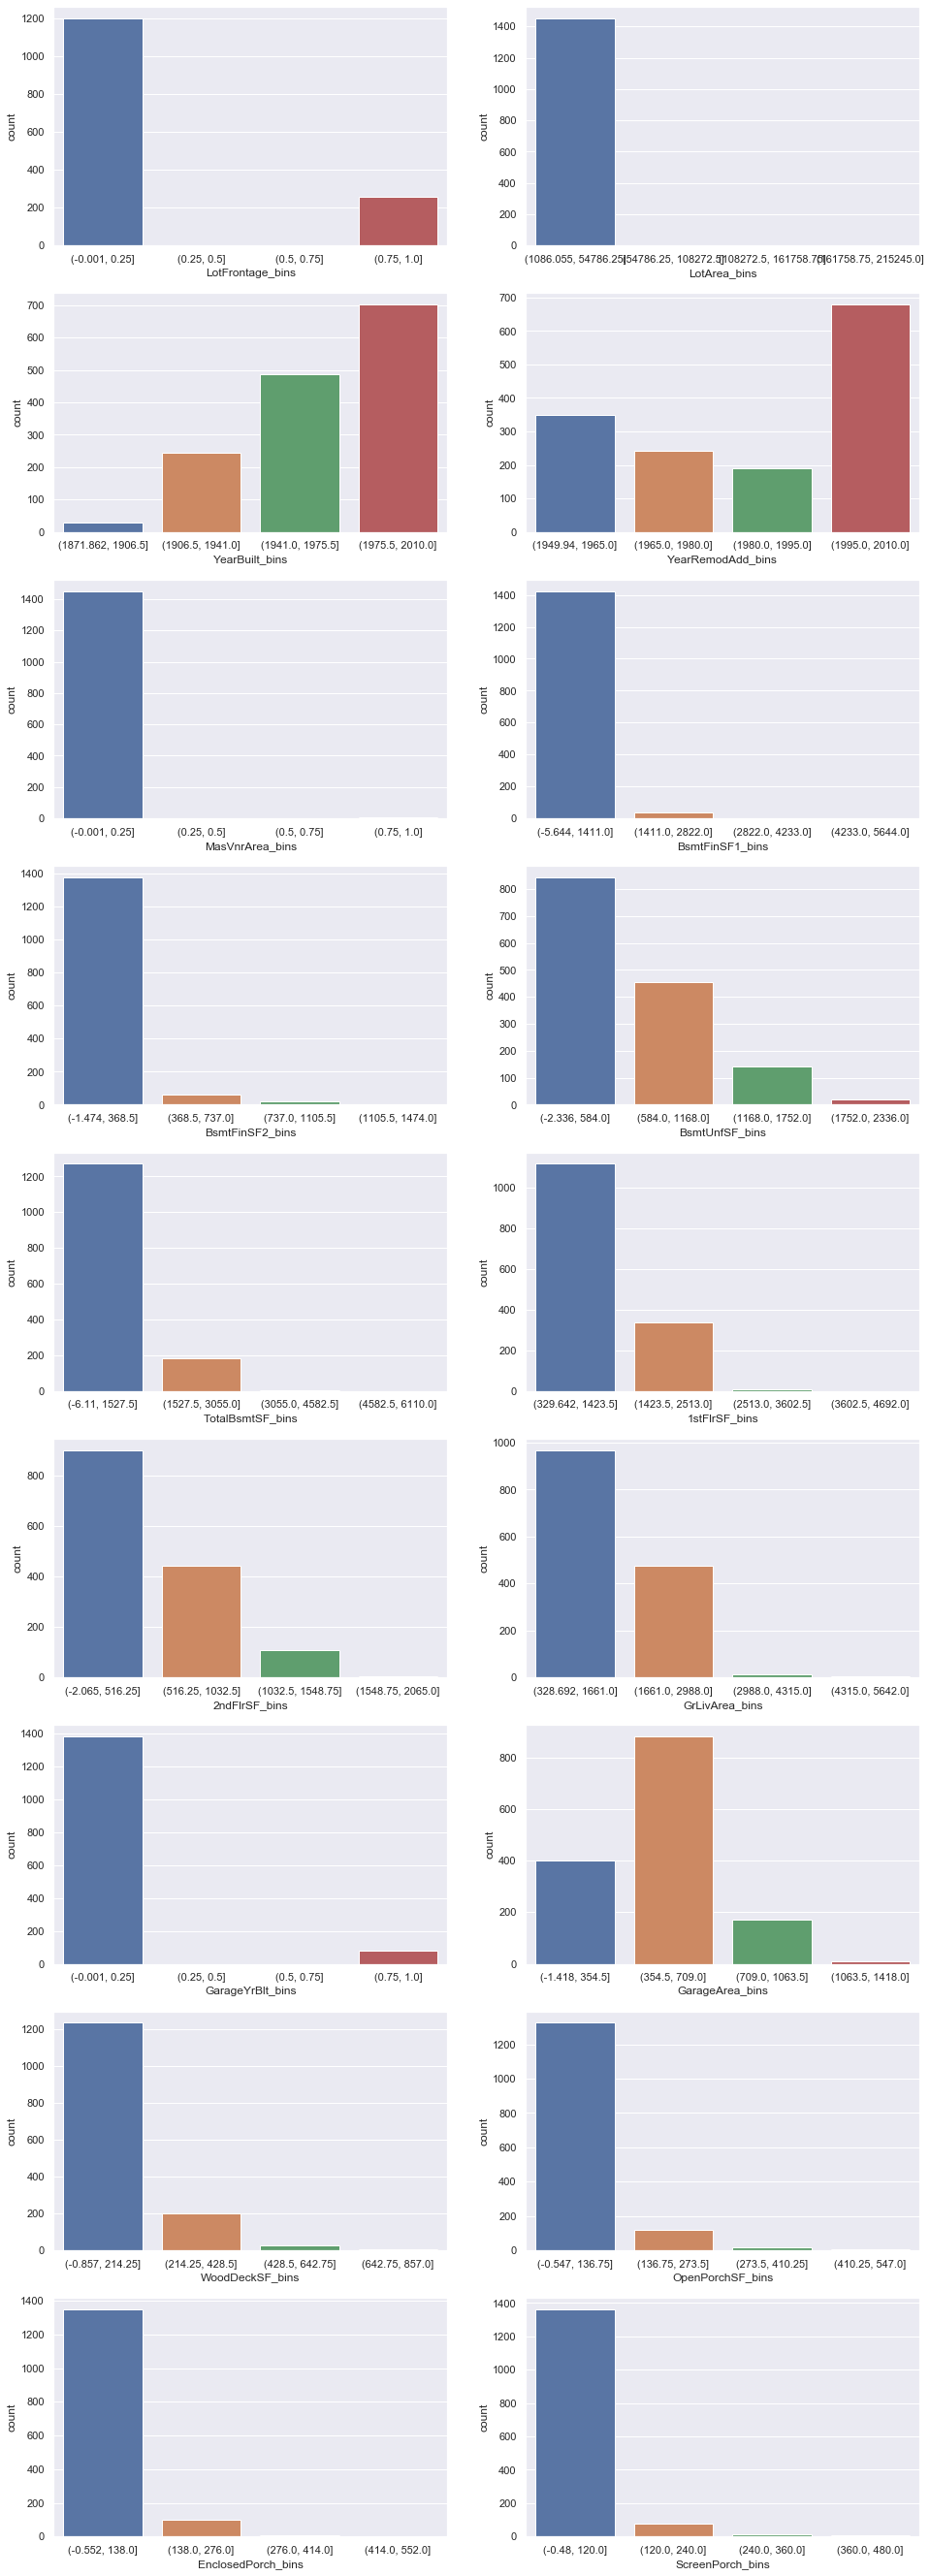

In [22]:
# lets check for the variance in the different continous numeric columns present in the dataset
plt.figure(figsize = (16,48))
for idx,col in enumerate(num_cont):
    col_bins = col+"_bins"
    house_eda[col_bins] = pd.cut(house_eda[col], 4, duplicates = 'drop') # creating bins
    plt.subplot(9,2,idx+1)
    sns.countplot(house_eda[col_bins])

**Following variables seems to have low variance:**
* MasVnArea
* BsmtFinSF1
* BsmtFinSF2
* BsmtUnfSF
* 2ndFlrSF
* LowQualFinSF
* WoodDeckSF
* OpenPorchSF
* EnclosedPorch
* 3SsnPorch
* ScreenPorch,
* PoolArea,
* MiscVal.

**We will see if we can drop these variables in Feature Engineering section.**

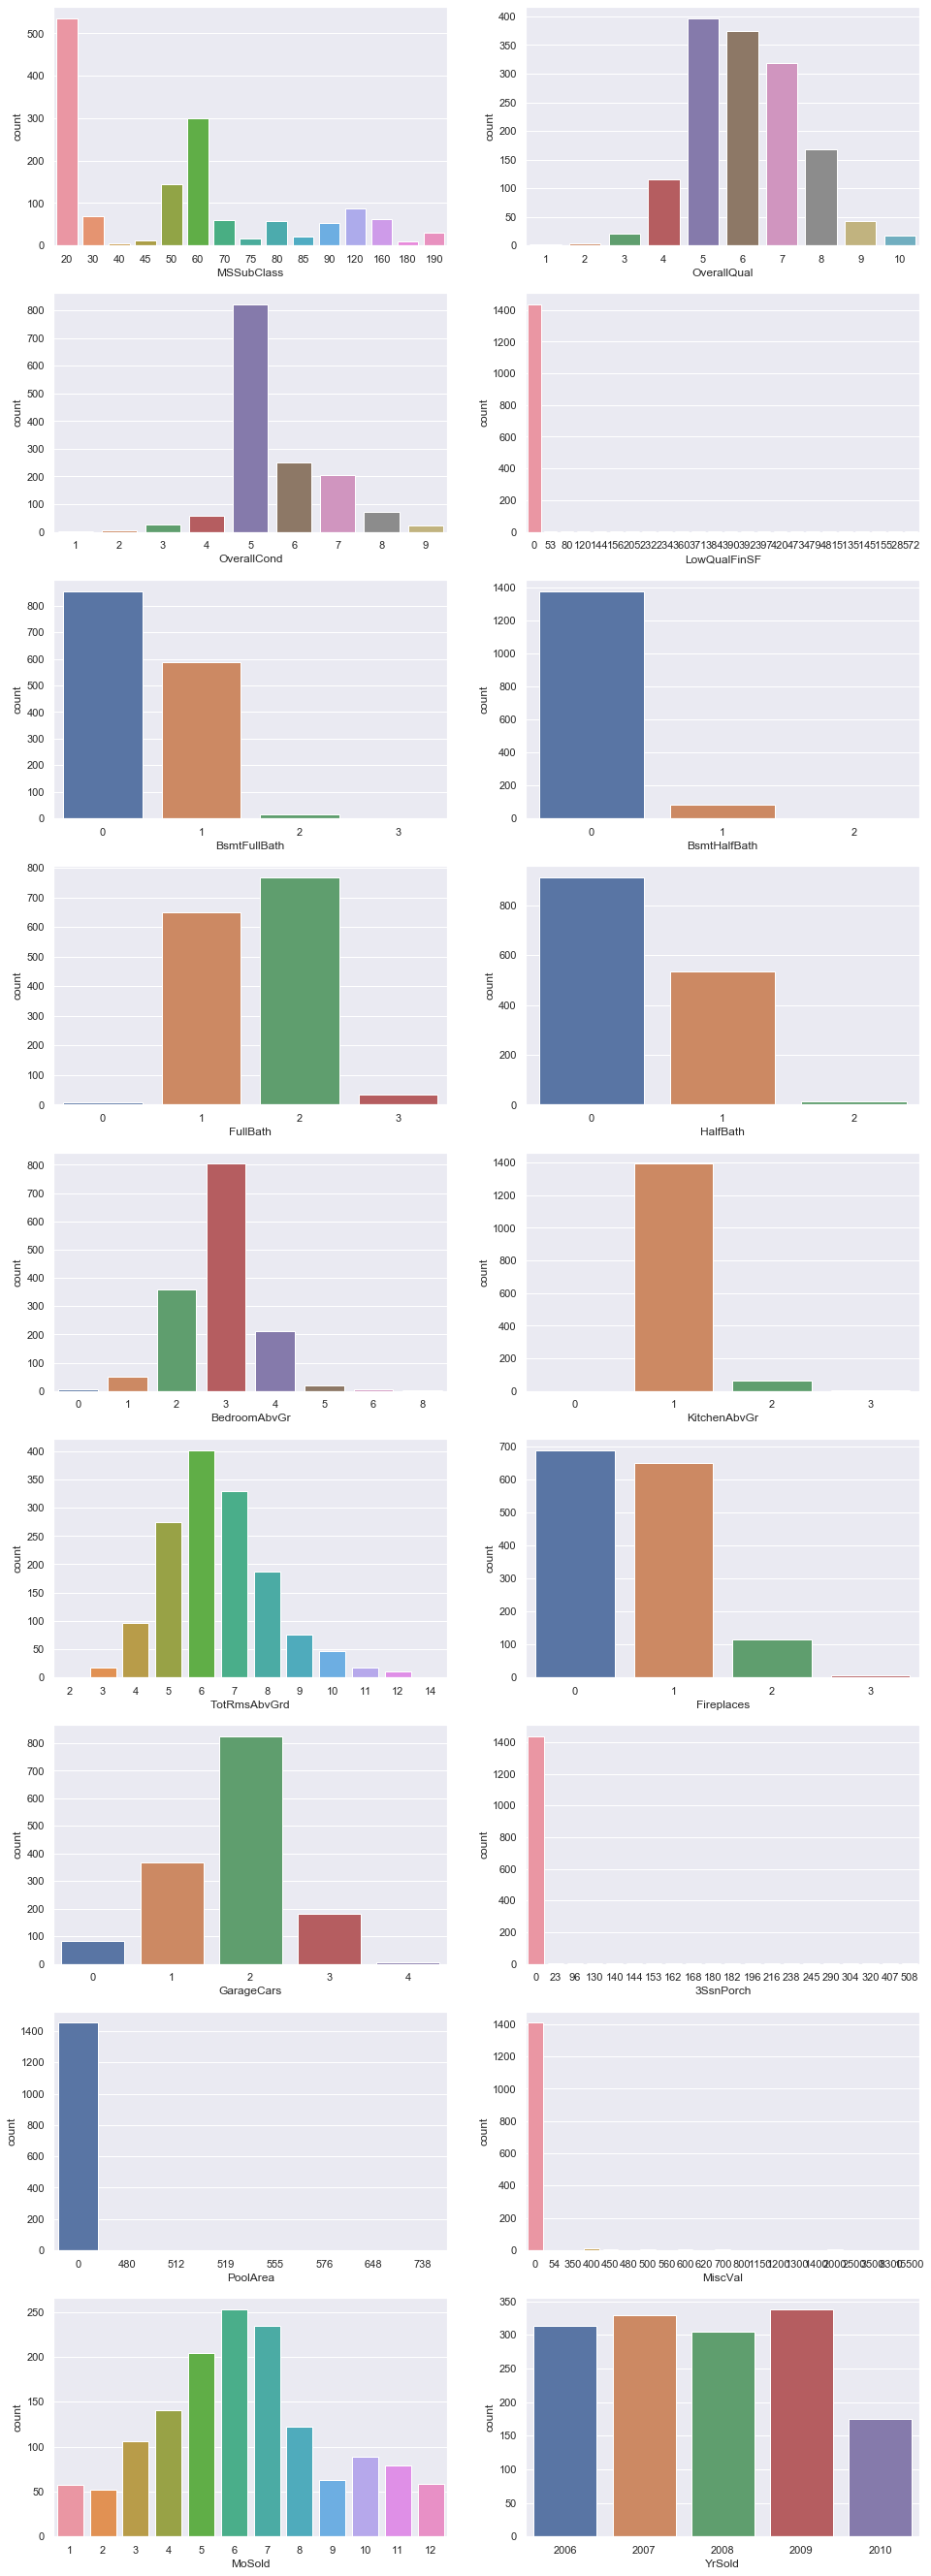

In [23]:
# lets check for the variance in the different continous numeric columns present in the dataset
plt.figure(figsize = (16,48))
for idx,col in enumerate(num_disc):
    plt.subplot(9,2,idx+1)
    sns.countplot(house_eda[col])

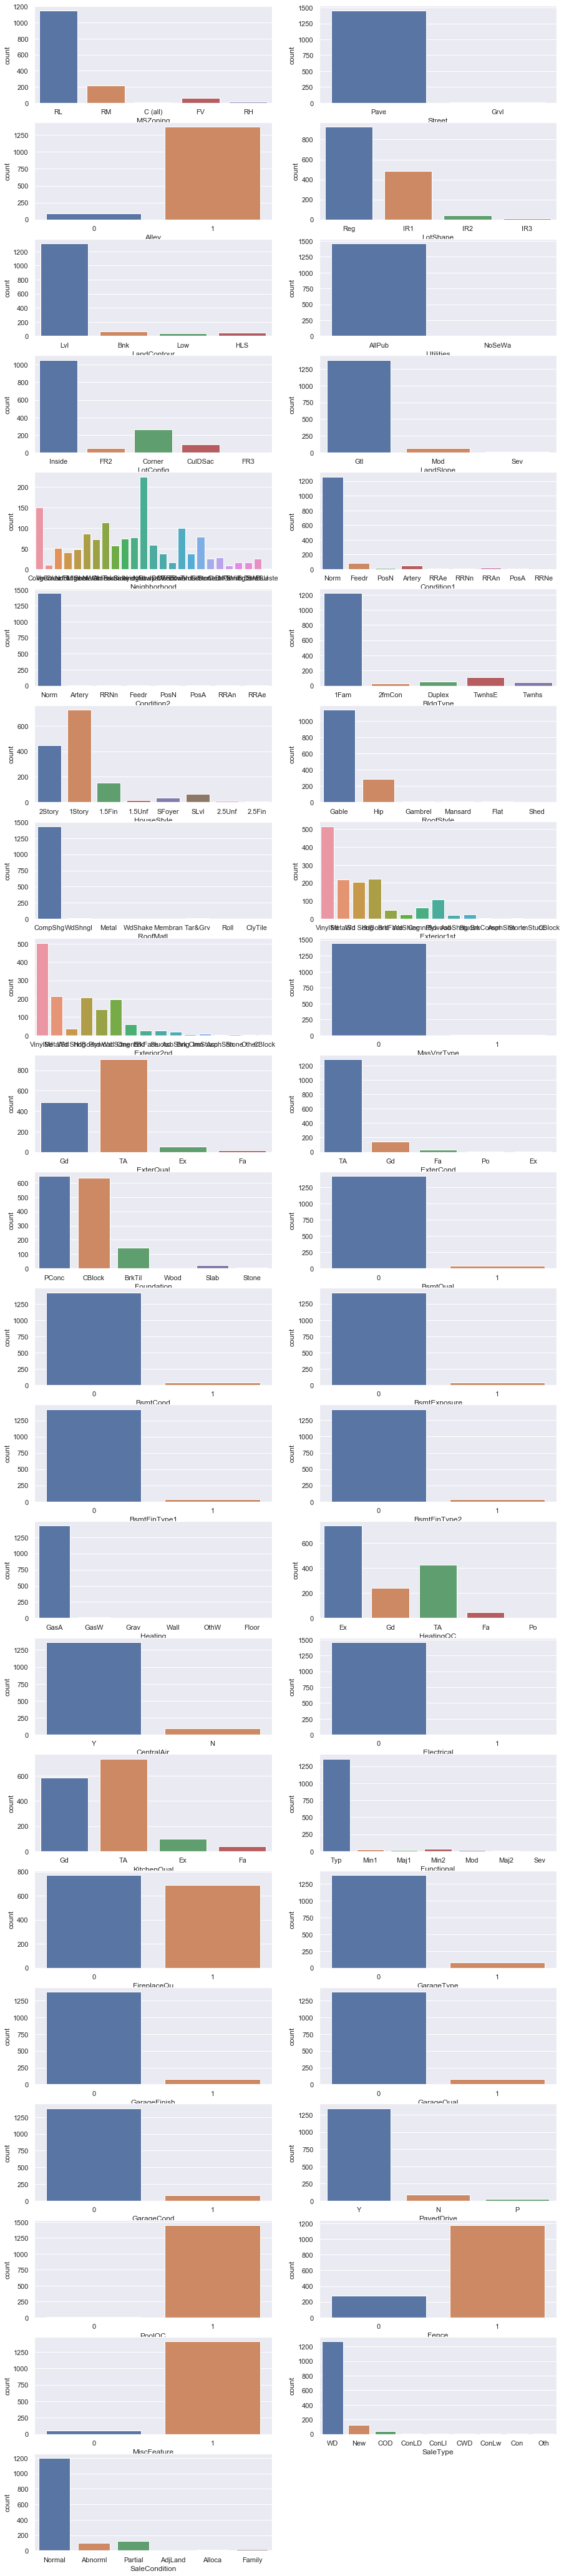

In [24]:
# lets check for the variance in the categorical columns present in the dataset
plt.figure(figsize = (15,75))
for idx,col in enumerate(cat_vars):
    plt.subplot(22,2,idx+1)
    sns.countplot(house_eda[col])

**Following variables seems to have low variance:**

* Street,
* Alley,
* LandContour,
* Utilities,
* Condition2,
* RoofMatl,
* Heating,
* GarageCond,
* PavedDrive,
* PoolQC,
* MiscFeature
* SaleType

**We will see if we can drop these variables in Feature Engineering section.**

### Bi-Variate analysis with "SalePrice"

**Now we will see how SalePrice varies with respect to "Continous numeric variables" in the dataset**

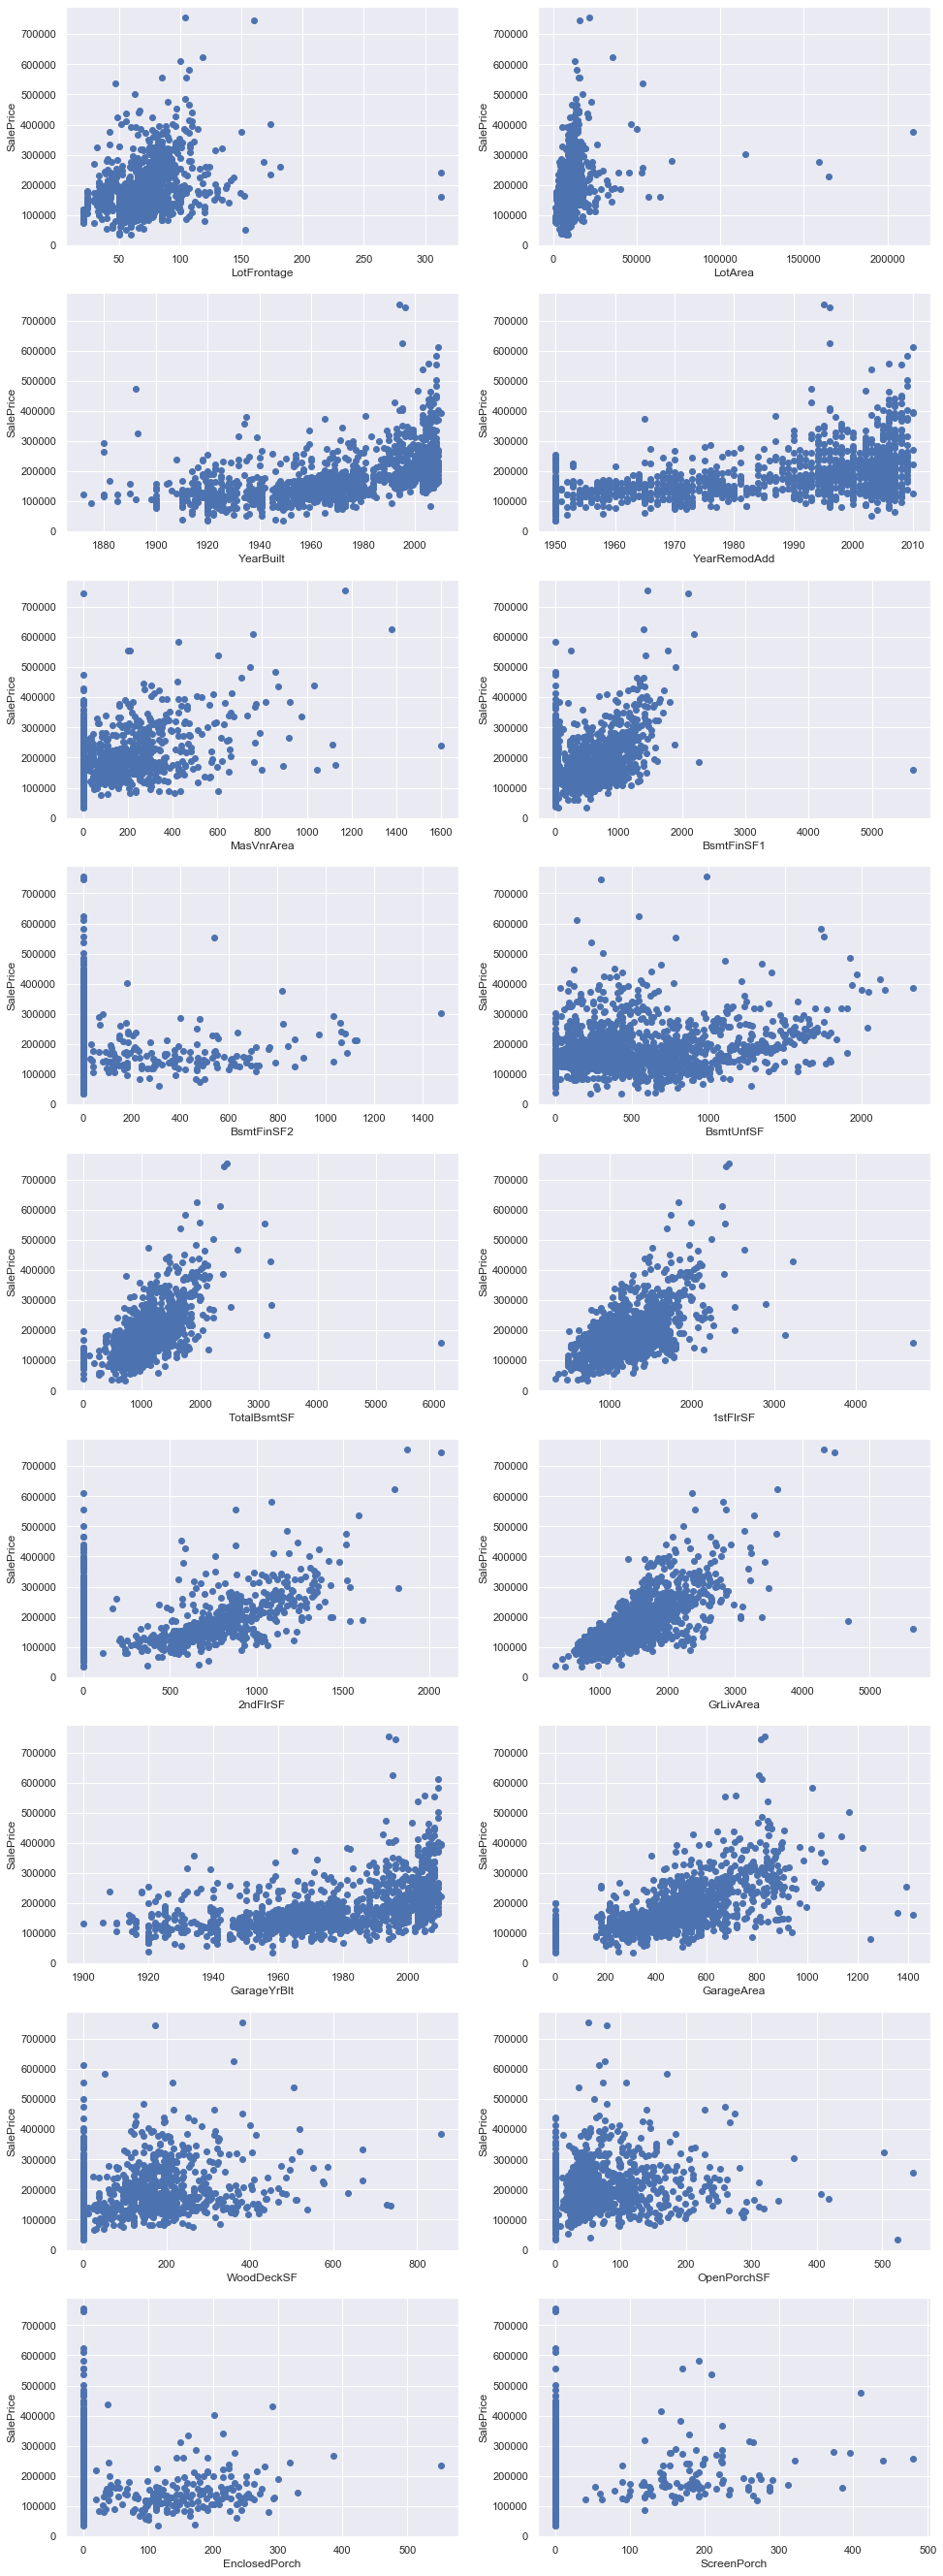

In [25]:
# now lets plot the graphs for continous variables
plt.figure(figsize=(16,48))
for idx,col in enumerate(num_cont):
    plt.subplot(9,2,idx+1)
    plt.scatter(x = house[col],y=house["SalePrice"])
    plt.ylabel("SalePrice")
    plt.xlabel(col)

**Let's analyze these graphs one by one:**
* **Lotfrontage: Most of the records seems to have values between in the range of 0-150, there are couple of dots at 300, these seems to be outliers, shows descent relation with sales prce**
* **LotArea: records are concentrated towards low values, there are outliers here as well, not much relation with sales price**
* **MasVnrArea: shows good relation with saleprices, but there are clear outliers present for this variable**
* **BsmtFinSF1: not much relation with sale price, there are outliers present here as well**
* **BsmtFinSF2: not much relation with sale price, there are outliers present here as well**
* **BsmtUnfSF:  not much relation with sale price, there are outliers present here as well**
* **TotalBsmtSF:shows good relation with saleprices, but there is an outlier for value of 6000**
* **2ndFlrSF:shows good relation with saleprices, but there are outliers present**
* **GrLivArea: shows good relation with saleprices, but there are outliers present**
* **GarageArea: shows good relation with saleprices, but there are outliers present**
* **WoodDeckSF: shows good relation with saleprices, but there are outliers present**
* **OpenPorchSF: not much relation with sale price, there are outliers present here as well**
* **EnclosedPorch: not much relation with sale price, there are outliers present here as well**
* **ScreenPorch: does not seem to have a lot of variation at the first place**
* **All remaining variables seems to have a good relation with the target variable and there are not outliers**

**Now we will see how SalePrice varies with respect to "Discrete numeric variables" in the dataset**

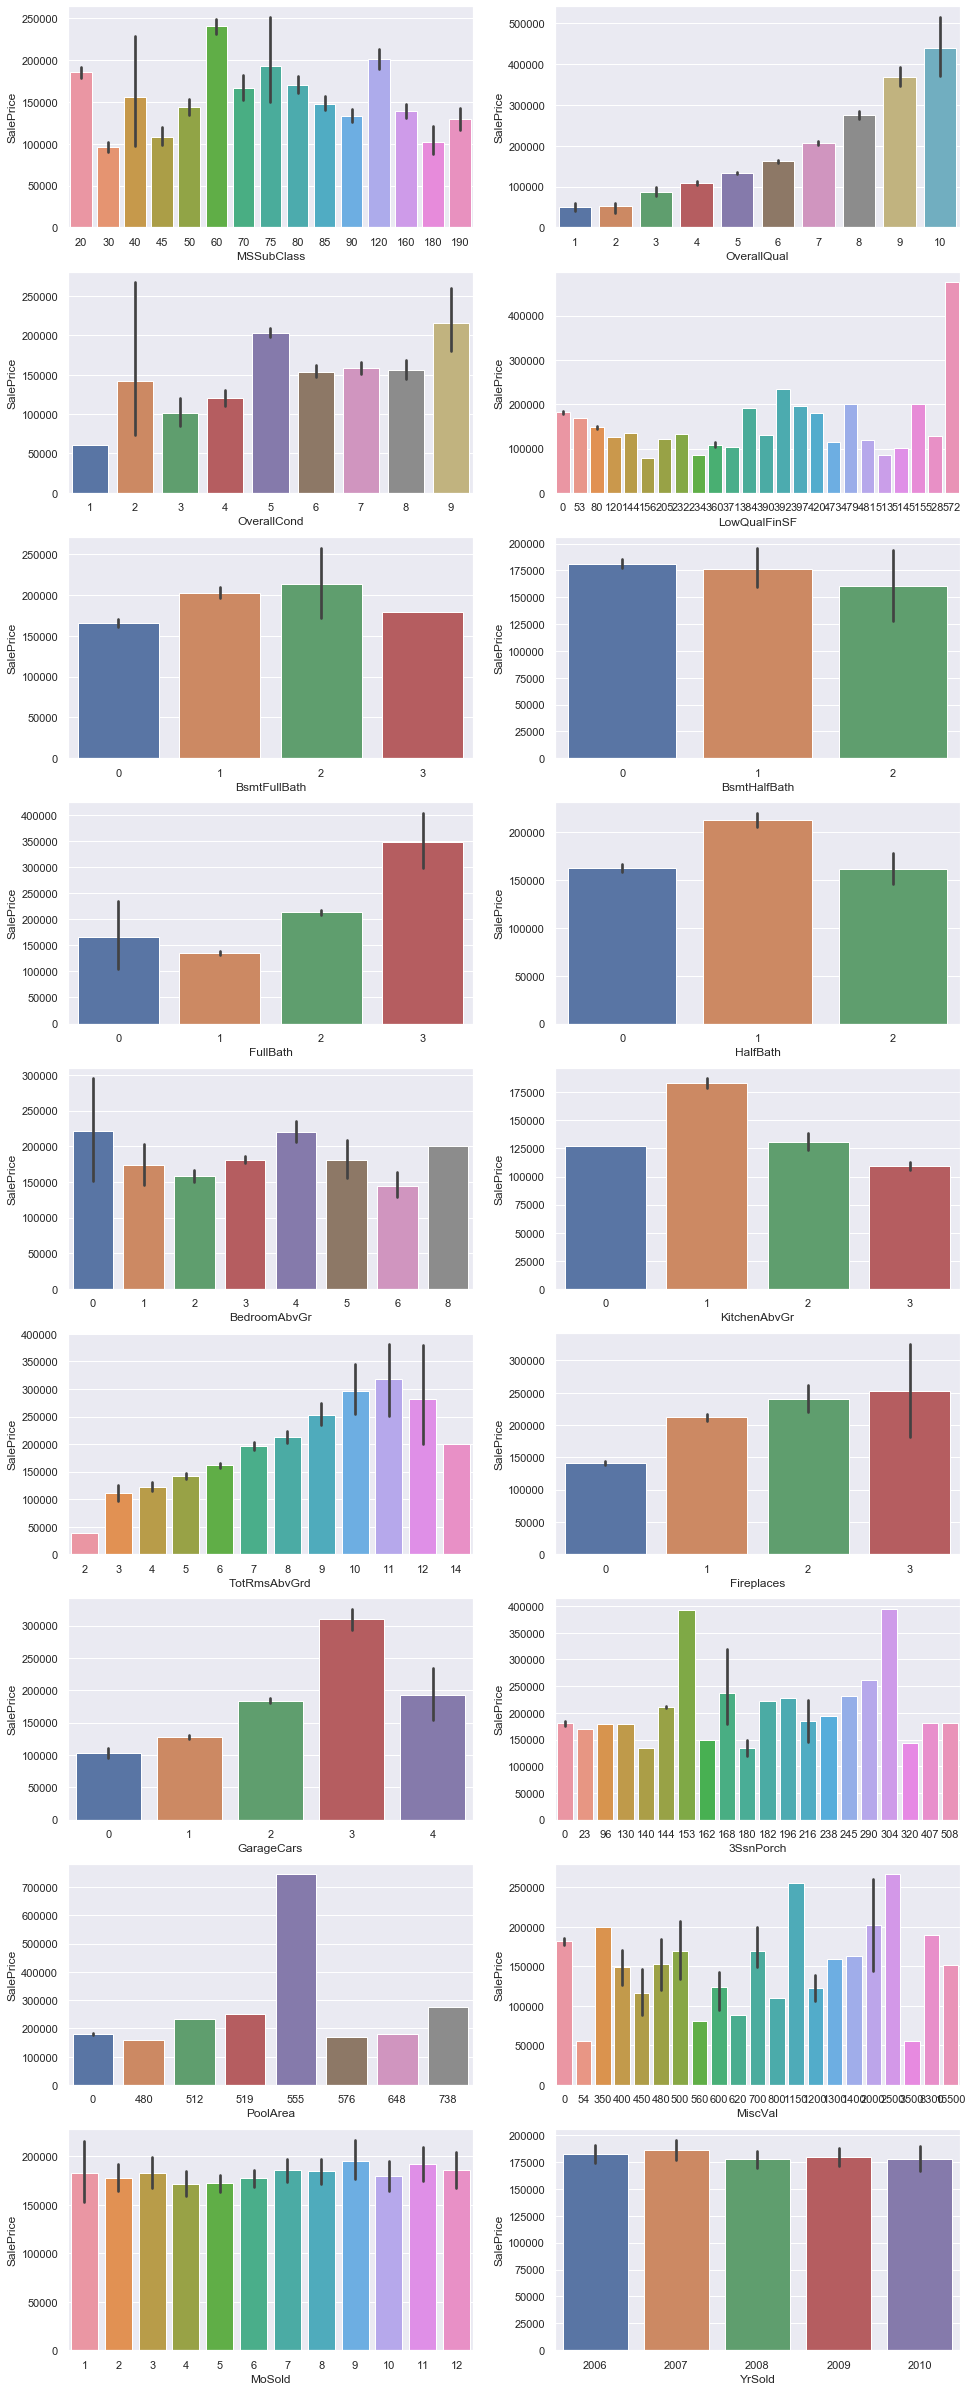

In [26]:
# now lets plot the graphs for discrete variables
plt.figure(figsize=(16,48))
for idx,col in enumerate(num_disc):
    plt.subplot(10,2,idx+1)
    sns.barplot(x = house[col],y=house["SalePrice"])
    plt.ylabel("SalePrice")
    plt.xlabel(col)

**Let's analyze these graphs as well:**
* **OverallQual: Sale Price increases as the quality of the house increases.As expected!**
* **TotRmsAbvGrd: Sale Price increases as the quality of the house increases except for the last value**
* **Fireplaces: Sale Price increases as the quality of the house increases except for the last value**
* **Remaining variables do not seem to be related strongly with SalePrice**

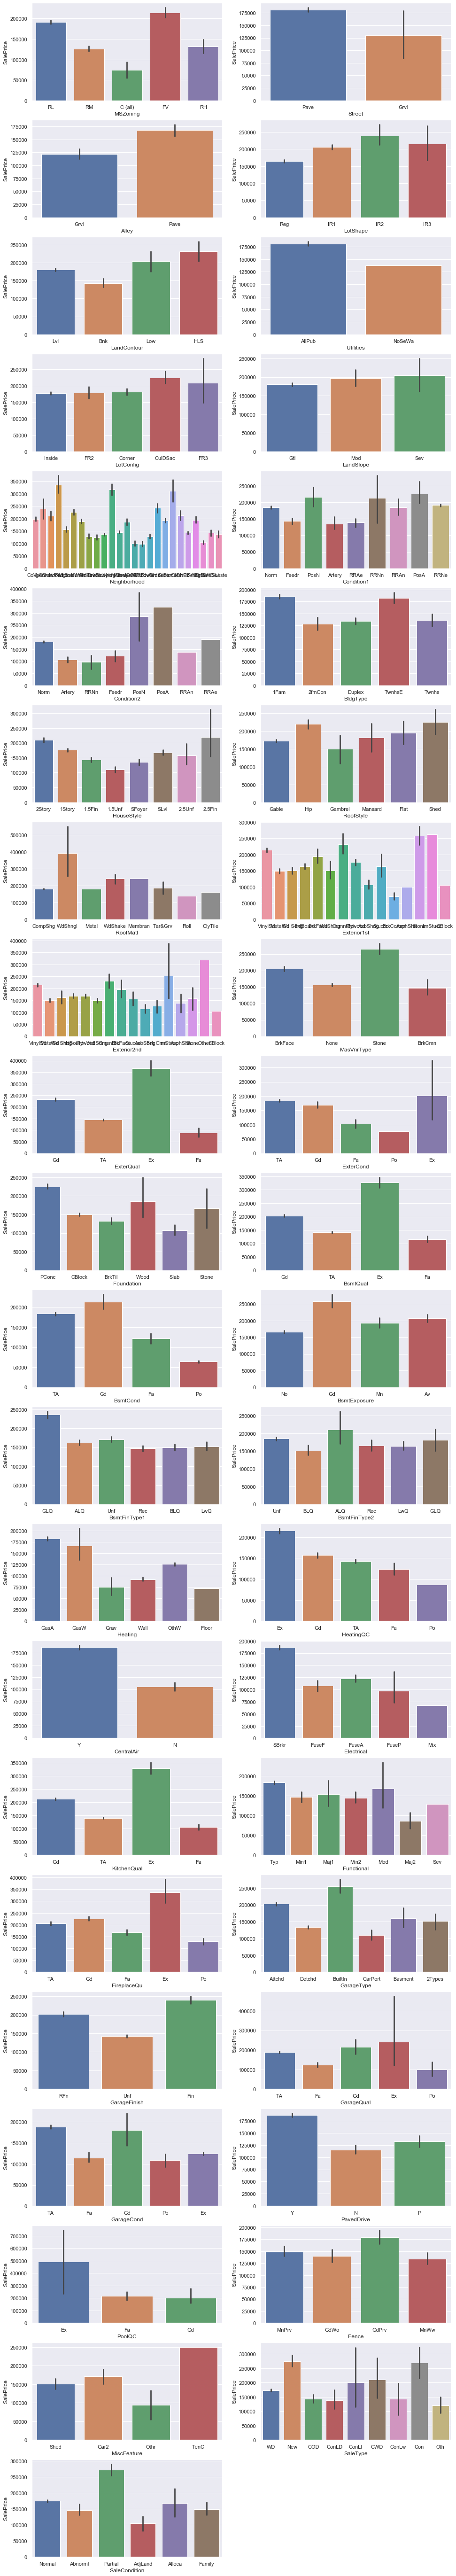

In [27]:
# lets check relation of sale price with categorical variables
plt.figure(figsize=(16,100))
for idx,col in enumerate(cat_vars):
    plt.subplot(22,2,idx+1)
    sns.barplot(x = house[col],y=house["SalePrice"])
    plt.ylabel("SalePrice")
    plt.xlabel(col)

Lots of features seems to be skewed, we will handle this in feature engineering section

### Outliars Detection

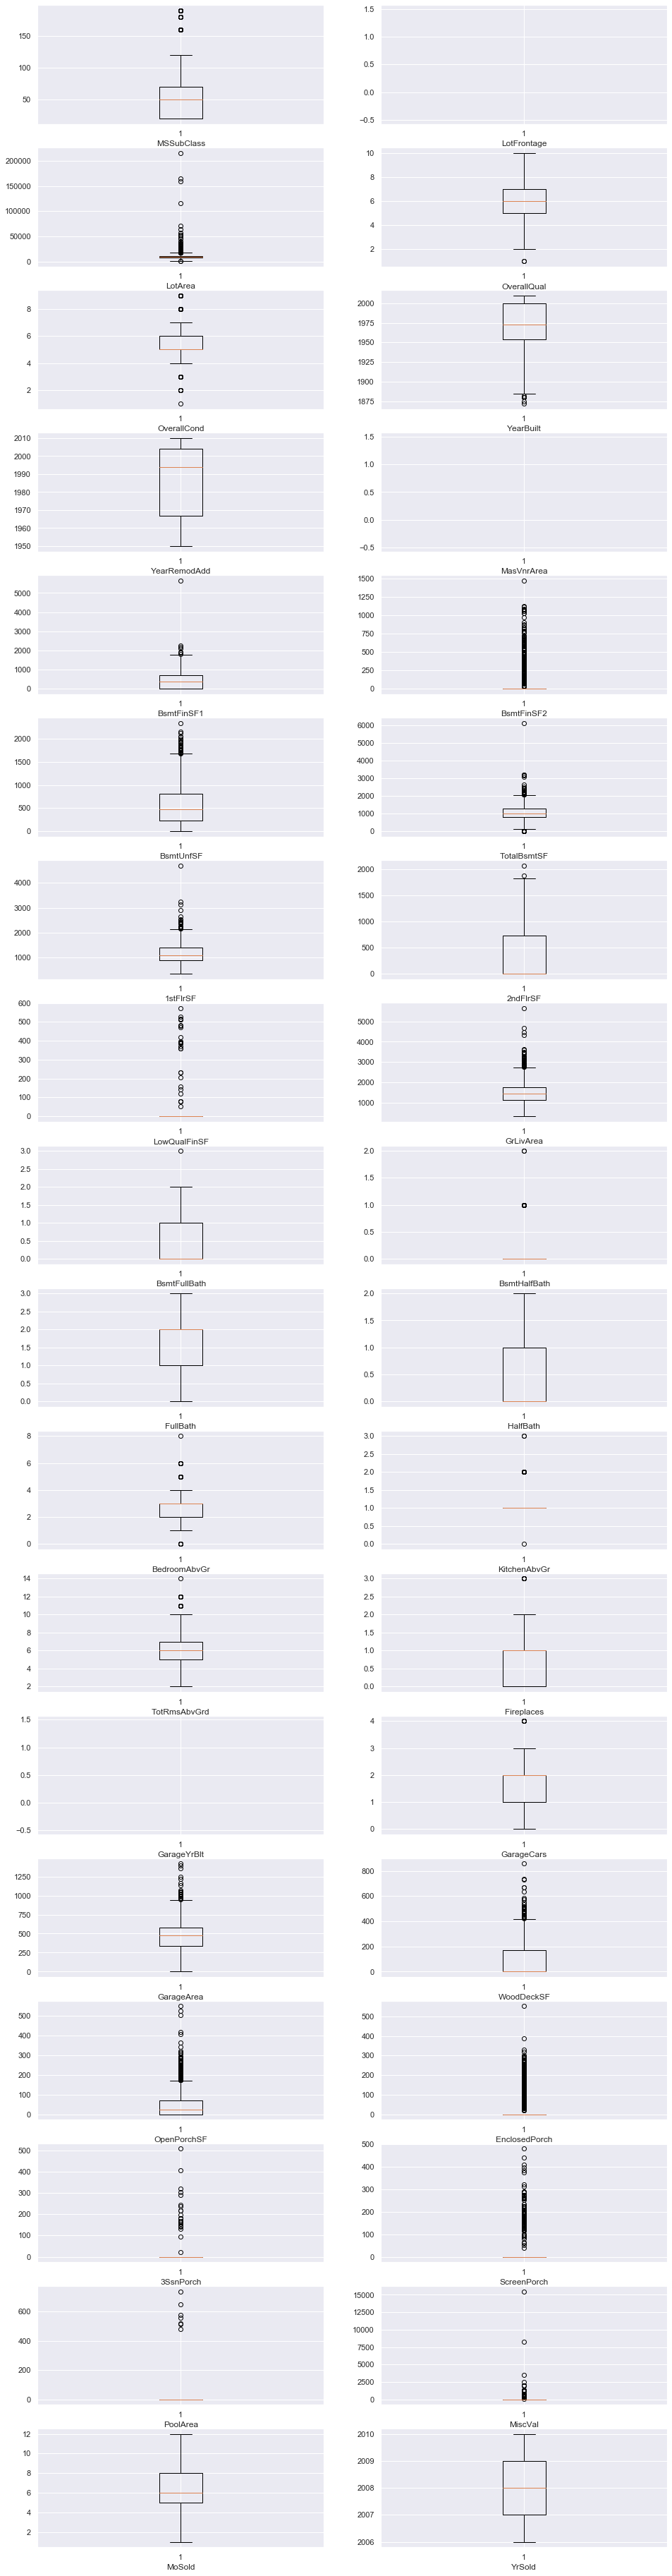

In [28]:
# lets create boxplots to detect outliars detection 
plt.figure(figsize=(16,70))
for idx,col in enumerate(num_vars):
    plt.subplot(19,2,idx+1)
    plt.boxplot(house[col])
    plt.xlabel(col)

There are outliers in the dataset, these will be treated in the data engineering section

# Feature Engineering

**We have had a lot of observations from Data Analysis Section, time to act on them!**

In [29]:
# lets read the test dataset, we will apply all the feature engineering operations on test set as well
test_set = pd.read_csv("test.csv")

# save "Id" in a variable and drop the column (as we have already dropped from train dataset)
test_set_id = test_set.Id
test_set.drop("Id",1,inplace = True)

# save SalePrice to a variable and drop it from training dataset as test dataset does not have this column
train_sp = house.SalePrice
house.drop("SalePrice",1,inplace=True)

# merge the two datasets
master=pd.concat((house,test_set)).reset_index(drop=True)

In [30]:
master.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706.0,Unf,0.0,150.0,856.0,GasA,Ex,Y,SBrkr,856,854,0,1710,1.0,0.0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2.0,548.0,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.0,Unf,0.0,284.0,1262.0,GasA,Ex,Y,SBrkr,1262,0,0,1262,0.0,1.0,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2.0,460.0,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486.0,Unf,0.0,434.0,920.0,GasA,Ex,Y,SBrkr,920,866,0,1786,1.0,0.0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2.0,608.0,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216.0,Unf,0.0,540.0,756.0,GasA,Gd,Y,SBrkr,961,756,0,1717,1.0,0.0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3.0,642.0,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655.0,Unf,0.0,490.0,1145.0,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1.0,0.0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3.0,836.0,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal


### Treating missing values

In [31]:
# all missing values for the categorical columns will be replaced by "None"
# all missing values for the numeric columns will be replaced by median of that field

for col in master.columns:
    if master[col].dtypes == 'O':
        master[col] = master[col].replace(np.nan,"None")
    else:
        master[col] = master[col].replace(np.nan,master[col].median())

In [32]:
# Let's check the null values again
master.isnull().sum().sort_values(ascending  = False)

SaleCondition    0
Foundation       0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
                ..
TotRmsAbvGrd     0
Functional       0
Fireplaces       0
FireplaceQu      0
MSSubClass       0
Length: 79, dtype: int64

# Age Variables

In [33]:
# creating age of the master from year built to the sale of the master
master['HouseAge'] =  master['YrSold'] - master['YearBuilt']
# age of master after remodelling
master['RemodAddAge'] = master['YrSold'] - master['YearRemodAdd']
# creating age of the garage from year built of the garage to the sale of the master
master['GarageAge'] = master['YrSold'] - master['GarageYrBlt'] 

# lets drop original variables
master.drop(["YearBuilt","YearRemodAdd","GarageYrBlt"],1,inplace = True)

num_cont.remove("YearBuilt")
num_cont.remove("YearRemodAdd")
num_cont.remove("GarageYrBlt")

# Skewness

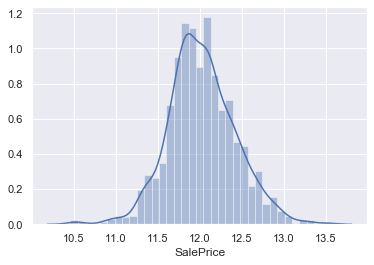

In [34]:
# lets handle skewness in saleprice, lets take log to get normal distribution
train_sp = np.log(train_sp)

# lets check the distribution of saleprice again
sns.distplot(train_sp)

Saleprice now follow normal distribution, lets check other variables for skewness

In [35]:
# taking the log of numeric variables to hanlde skewness
num_features=['LotFrontage', 'LotArea', '1stFlrSF', 'GrLivArea']
for col in num_features:
    master[col] = np.log(master[col])

# Drop columns with low variance

In [36]:
#Following variables were found to have low variance:
# MasVnArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,2ndFlrSF,LowQualFinSF,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch, 
#PoolArea,MiscVal
#lets see the frequency of each of the value

low_var = ["MasVnrArea","BsmtFinSF1","BsmtFinSF2","BsmtUnfSF","2ndFlrSF","LowQualFinSF","WoodDeckSF","OpenPorchSF","EnclosedPorch","3SsnPorch","ScreenPorch", "PoolArea","MiscVal"]

for col in low_var:
    print("\nDifferent values for ",col,"with count:",master[col].value_counts())
    
    
# from the numbers seen below, we can drop following columns
col_drop = ["BsmtFinSF1","BsmtFinSF2","LowQualFinSF","EnclosedPorch","3SsnPorch","ScreenPorch","PoolArea","MiscVal"]

master.drop(col_drop,1,inplace=True)


Different values for  MasVnrArea with count: 0.0      1761
120.0      15
176.0      13
200.0      13
216.0      12
         ... 
664.0       1
247.0       1
550.0       1
137.0       1
572.0       1
Name: MasVnrArea, Length: 444, dtype: int64

Different values for  BsmtFinSF1 with count: 0.0       929
24.0       27
16.0       14
300.0       9
288.0       8
         ... 
1022.0      1
939.0       1
1124.0      1
1619.0      1
883.0       1
Name: BsmtFinSF1, Length: 992, dtype: int64

Different values for  BsmtFinSF2 with count: 0.0      2572
294.0       5
180.0       5
162.0       3
539.0       3
         ... 
196.0       1
904.0       1
456.0       1
624.0       1
823.0       1
Name: BsmtFinSF2, Length: 272, dtype: int64

Different values for  BsmtUnfSF with count: 0.0       241
384.0      19
728.0      14
672.0      13
600.0      12
         ... 
1503.0      1
445.0       1
958.0       1
1559.0      1
1369.0      1
Name: BsmtUnfSF, Length: 1135, dtype: int64

Different values for  2n

In [37]:
# lets check variation in categorical variables identied in data analysis section
low_var = ["Street","Alley","LandContour","Utilities","Condition2","RoofMatl","Heating","GarageCond","PavedDrive","PoolQC","MiscFeature","SaleType"]
for col in low_var:
    print("\nDifferent values for ",col,"with count:",master[col].value_counts())

# from the numbers seen below, we can drop following columns
col_drop = ["Street","Alley","Utilities","Condition2","RoofMatl","Heating","GarageCond","PavedDrive","PoolQC","MiscFeature"]
            
master.drop(col_drop,1,inplace=True)


Different values for  Street with count: Pave    2907
Grvl      12
Name: Street, dtype: int64

Different values for  Alley with count: None    2721
Grvl     120
Pave      78
Name: Alley, dtype: int64

Different values for  LandContour with count: Lvl    2622
HLS     120
Bnk     117
Low      60
Name: LandContour, dtype: int64

Different values for  Utilities with count: AllPub    2916
None         2
NoSeWa       1
Name: Utilities, dtype: int64

Different values for  Condition2 with count: Norm      2889
Feedr       13
Artery       5
PosA         4
PosN         4
RRNn         2
RRAn         1
RRAe         1
Name: Condition2, dtype: int64

Different values for  RoofMatl with count: CompShg    2876
Tar&Grv      23
WdShake       9
WdShngl       7
Roll          1
Metal         1
ClyTile       1
Membran       1
Name: RoofMatl, dtype: int64

Different values for  Heating with count: GasA     2874
GasW       27
Grav        9
Wall        6
OthW        2
Floor       1
Name: Heating, dtype: int64

In [38]:
# lets chekc the shape of the updated dataset
master.shape

(2919, 61)

In [39]:
# In order to perform linear regression, we need to convert categorical variables to numeric variables.

# We have ordinal variables present in the dataest, lets treat them first:
master['ExterQual'] = master['ExterQual'].map({'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1})
master['ExterCond'] = master['ExterCond'].map({'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1})
master['BsmtQual'] = master['BsmtQual'].map({'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1,'None':0})
master['BsmtCond'] = master['BsmtCond'].map({'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1,'None':0})
master['BsmtExposure'] = master['BsmtExposure'].map({'Gd':4,'Av':3,'Mn':2,'No':1,'None':0})
master['BsmtFinType1'] = master['BsmtFinType1'].map({'GLQ':6,'ALQ':5,'BLQ':4,'Rec':3,'LwQ':2,'Unf':1,'None':0})
master['BsmtFinType2'] = master['BsmtFinType2'].map({'GLQ':6,'ALQ':5,'BLQ':4,'Rec':3,'LwQ':2,'Unf':1,'None':0})
master['HeatingQC'] = master['HeatingQC'].map({'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1})
master['CentralAir'] = master['CentralAir'].map({'N':0,'Y':1})
master['KitchenQual'] = master['KitchenQual'].map({'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1,'None':0})
master['GarageQual'] = master['GarageQual'].map({'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1,'None':0})
master['GarageFinish'] = master['GarageFinish'].map({'Fin':3,'RFn':2,'Unf':1,'None':0})

In [40]:
# now lets create dummy variables for the remaining cateogorical variables
cat_vars = []
for col in master.columns:
    if master[col].dtypes == 'O':
        cat_vars.append(col)

# convert into dummies
master_dummies = pd.get_dummies(master[cat_vars], drop_first=True)

# drop categorical variables 
master.drop(cat_vars,1,inplace = True)

# concat dummy variables with X
master = pd.concat([master, master_dummies], axis=1)

# lets check the shape of the final dataset
master.shape

(2919, 185)

In [41]:
# we have perfomed all the necessary operations on the train and test datasets, time to sperate the two sets again
train_set = master[:1460]

test_set = master[1460:]

In [42]:
train_set["SalePrice"] = train_sp
# lets check the variables
num_vars = []
for col in train_set.columns:
    if train_set[col].dtypes != 'O':
        num_vars.append(col)

for col in num_vars:
    print(train_set[col].describe(percentiles = [0.05,0.10,0.25,0.50,0.75,0.90,0.95,0.99]))
    print("\n")
    
# lets handle the outliers
q3 = train_set['LotFrontage'].quantile(0.99)
train_set = train_set[train_set.LotFrontage <= q3]
    
q3 = train_set['MasVnrArea'].quantile(0.99)
train_set = train_set[train_set.MasVnrArea <= q3]

q3 = train_set['BsmtUnfSF'].quantile(0.99)
train_set = train_set[train_set.BsmtUnfSF <= q3]

q3 = train_set['TotalBsmtSF'].quantile(0.99)
train_set = train_set[train_set.TotalBsmtSF <= q3]

q3 = train_set['2ndFlrSF'].quantile(0.99)
train_set = train_set[train_set["2ndFlrSF"]<= q3]

count    1460.000000
mean       56.897260
std        42.300571
min        20.000000
5%         20.000000
10%        20.000000
25%        20.000000
50%        50.000000
75%        70.000000
90%       120.000000
95%       160.000000
99%       190.000000
max       190.000000
Name: MSSubClass, dtype: float64


count    1460.000000
mean        4.196097
std         0.320158
min         3.044522
5%          3.582110
10%         3.891820
25%         4.094345
50%         4.219508
75%         4.369448
90%         4.521789
95%         4.644391
99%         4.922963
max         5.746203
Name: LotFrontage, dtype: float64


count    1460.000000
mean        9.110838
std         0.517448
min         7.170120
5%          8.105201
10%         8.517193
25%         8.929766
50%         9.156781
75%         9.358890
90%         9.573711
95%         9.764292
99%        10.533322
max        12.279532
Name: LotArea, dtype: float64


count    1460.000000
mean        6.099315
std         1.382997
min         1.0

Name: Fireplaces, dtype: float64


count    1460.000000
mean        1.715753
std         0.892831
min         0.000000
5%          0.000000
10%         1.000000
25%         1.000000
50%         2.000000
75%         2.000000
90%         3.000000
95%         3.000000
99%         3.000000
max         3.000000
Name: GarageFinish, dtype: float64


count    1460.000000
mean        1.767123
std         0.747315
min         0.000000
5%          0.000000
10%         1.000000
25%         1.000000
50%         2.000000
75%         2.000000
90%         3.000000
95%         3.000000
99%         3.000000
max         4.000000
Name: GarageCars, dtype: float64


count    1460.000000
mean      472.980137
std       213.804841
min         0.000000
5%          0.000000
10%       240.000000
25%       334.500000
50%       480.000000
75%       576.000000
90%       757.100000
95%       850.100000
99%      1002.790000
max      1418.000000
Name: GarageArea, dtype: float64


count    1460.000000
mean        2.8102

Name: LandSlope_Mod, dtype: float64


count    1460.000000
mean        0.008904
std         0.093973
min         0.000000
5%          0.000000
10%         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
90%         0.000000
95%         0.000000
99%         0.000000
max         1.000000
Name: LandSlope_Sev, dtype: float64


count    1460.000000
mean        0.001370
std         0.036999
min         0.000000
5%          0.000000
10%         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
90%         0.000000
95%         0.000000
99%         0.000000
max         1.000000
Name: Neighborhood_Blueste, dtype: float64


count    1460.000000
mean        0.010959
std         0.104145
min         0.000000
5%          0.000000
10%         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
90%         0.000000
95%         0.000000
99%         1.000000
max         1.000000
Name: Neighborhood_BrDale, dtype: float64


count    1460.00

Name: Condition1_RRAn, dtype: float64


count    1460.000000
mean        0.001370
std         0.036999
min         0.000000
5%          0.000000
10%         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
90%         0.000000
95%         0.000000
99%         0.000000
max         1.000000
Name: Condition1_RRNe, dtype: float64


count    1460.000000
mean        0.003425
std         0.058440
min         0.000000
5%          0.000000
10%         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
90%         0.000000
95%         0.000000
99%         0.000000
max         1.000000
Name: Condition1_RRNn, dtype: float64


count    1460.000000
mean        0.021233
std         0.144209
min         0.000000
5%          0.000000
10%         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
90%         0.000000
95%         0.000000
99%         1.000000
max         1.000000
Name: BldgType_2fmCon, dtype: float64


count    1460.000000



count    1460.000000
mean        0.017808
std         0.132299
min         0.000000
5%          0.000000
10%         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
90%         0.000000
95%         0.000000
99%         1.000000
max         1.000000
Name: Exterior1st_WdShing, dtype: float64


count    1460.000000
mean        0.002055
std         0.045299
min         0.000000
5%          0.000000
10%         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
90%         0.000000
95%         0.000000
99%         0.000000
max         1.000000
Name: Exterior2nd_AsphShn, dtype: float64


count    1460.000000
mean        0.004795
std         0.069100
min         0.000000
5%          0.000000
10%         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
90%         0.000000
95%         0.000000
99%         0.000000
max         1.000000
Name: Exterior2nd_Brk Cmn, dtype: float64


count    1460.000000
mean        0.017123
std   

Name: Fence_None, dtype: float64


count    1460.000000
mean        0.002740
std         0.052289
min         0.000000
5%          0.000000
10%         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
90%         0.000000
95%         0.000000
99%         0.000000
max         1.000000
Name: SaleType_CWD, dtype: float64


count    1460.000000
mean        0.001370
std         0.036999
min         0.000000
5%          0.000000
10%         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
90%         0.000000
95%         0.000000
99%         0.000000
max         1.000000
Name: SaleType_Con, dtype: float64


count    1460.000000
mean        0.006164
std         0.078298
min         0.000000
5%          0.000000
10%         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
90%         0.000000
95%         0.000000
99%         0.000000
max         1.000000
Name: SaleType_ConLD, dtype: float64


count    1460.000000
mean        

# Data Scaling

In [43]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

y = train_set.SalePrice.reset_index(drop=True)
train_set.drop("SalePrice",1,inplace=True)


scaler.fit(train_set)
X = scaler.transform(train_set)

# transform the train and test set, and add on the Id and SalePrice variables
X = pd.DataFrame(X,columns = train_set.columns).reset_index(drop=True)
X.head()

scaler.fit(test_set)
test_set = scaler.transform(test_set)
test_set = pd.DataFrame(test_set,columns = train_set.columns).reset_index(drop=True)

# PCA  (Dimensionality reduction)

In [44]:
#Improting the PCA module
from sklearn.decomposition import PCA
pca = PCA(svd_solver='randomized', random_state=42)

In [45]:
#let's apply PCA
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=42,
    svd_solver='randomized', tol=0.0, whiten=False)

In [46]:
#List of PCA components.It would be the same as the number of variables
pca.components_

array([[ 1.38460235e-03,  2.76571119e-02,  1.43424813e-02, ...,
        -4.64053831e-03, -5.91680733e-02,  9.32444878e-02],
       [-8.86514835e-02,  5.70954618e-02,  4.01559895e-02, ...,
         1.58351847e-03,  5.07804031e-02, -4.57794300e-02],
       [ 1.20432111e-01, -6.23975069e-03,  7.44355577e-03, ...,
        -2.68435979e-04,  1.30092684e-01, -1.02234156e-01],
       ...,
       [-0.00000000e+00,  3.10508329e-17, -2.64506156e-16, ...,
        -2.01334401e-17, -1.29749785e-17, -2.28626906e-16],
       [ 0.00000000e+00,  4.76133314e-17,  1.83506712e-16, ...,
         3.18648987e-17,  4.65721551e-19, -6.06237885e-17],
       [-0.00000000e+00, -1.48447265e-17,  3.31161784e-17, ...,
        -1.12162000e-17, -7.13005984e-18, -5.73882750e-17]])

In [47]:
#Let's check the variance ratios
pca.explained_variance_ratio_

array([1.35546873e-01, 7.90708175e-02, 5.94788544e-02, 4.21466149e-02,
       4.08811300e-02, 3.16236462e-02, 2.87677148e-02, 2.85440433e-02,
       2.72534871e-02, 2.44203493e-02, 2.29342295e-02, 2.22381816e-02,
       2.14082038e-02, 2.01855035e-02, 1.90290489e-02, 1.66103199e-02,
       1.60010274e-02, 1.45743508e-02, 1.41838885e-02, 1.30749038e-02,
       1.22072334e-02, 1.14778185e-02, 1.04430536e-02, 1.02139985e-02,
       9.64254746e-03, 9.48940722e-03, 9.09012153e-03, 8.56458841e-03,
       8.11844864e-03, 7.59794725e-03, 7.13228231e-03, 6.96942181e-03,
       6.28458331e-03, 6.20991702e-03, 5.93313517e-03, 5.83146663e-03,
       5.72435300e-03, 5.57912837e-03, 5.18666798e-03, 5.10791593e-03,
       4.93238351e-03, 4.76280679e-03, 4.70996994e-03, 4.36705533e-03,
       4.23863835e-03, 4.16572504e-03, 3.98888969e-03, 3.90404253e-03,
       3.77552276e-03, 3.66224424e-03, 3.55535925e-03, 3.46302146e-03,
       3.39394717e-03, 3.26383928e-03, 3.16887621e-03, 3.04603096e-03,
      

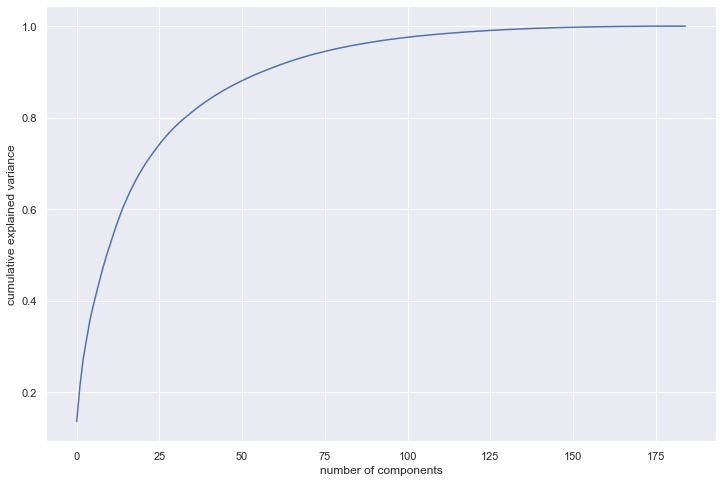

In [48]:
#Plotting the scree plot
#Making the screeplot - plotting the cumulative variance against the number of components
%matplotlib inline
fig = plt.figure(figsize = (12,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

**From Scree plot we can conclude that we 115 PCs can explain more than 90% variation of the dataset**

In [49]:
#Using incremental PCA for efficiency - saves a lot of time on larger datasets
from sklearn.decomposition import IncrementalPCA
pca_final = IncrementalPCA(n_components=115)

In [50]:
df_pca = pd.DataFrame(pca_final.fit_transform(X))
df_pca.shape

(1386, 115)

In [51]:
df_pca.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114
0,1.492622,-0.556563,-0.286735,-1.269805,-0.300628,-0.547112,0.130209,0.324901,0.384989,-0.039256,0.167744,0.439900,-0.342953,-0.130556,0.343137,0.046015,-0.164141,0.097662,-0.112546,0.449472,-0.024511,-0.064810,0.162239,0.331767,0.325742,-0.005664,0.149795,-0.136091,-0.296626,-0.095237,0.051504,-0.246441,-0.134720,-0.096758,-0.153424,-0.160673,-0.187607,0.058058,0.083597,-0.099141,-0.021243,-0.038639,0.094856,-0.134182,-0.072157,0.007301,0.033442,-0.034124,-0.029260,-0.001198,0.111599,-0.008539,0.091309,0.031929,0.025377,-0.042718,-0.007560,0.089865,-0.037813,0.000667,-0.069255,0.058891,0.037164,-0.027681,-0.031046,0.013892,0.057405,0.039752,0.045238,0.078910,-0.051891,0.048474,0.115740,-0.036707,-0.006128,-0.055104,-0.003091,0.029017,0.033275,-0.046947,-0.026761,0.001636,-0.016561,0.021293,-0.030243,-0.006102,0.033845,-0.016509,-0.020415,0.003059,-0.047930,-0.004489,0.040666,-0.012539,0.032298,0.009607,0.002653,0.016252,-0.013115,0.021754,-0.030007,-0.001303,0.037176,0.054684,-0.026941,-0.016747,-0.019772,-0.005227,-0.002856,-0.022828,-0.010466,0.021150,-0.025411,0.047191,-0.001490
1,-0.466123,0.836386,-0.011360,0.262404,0.447256,0.989061,-0.133149,0.941241,0.195086,0.146475,0.100752,-0.721007,-0.233919,-0.039511,-0.824254,0.589008,0.132805,-0.524282,-1.203475,0.160385,-0.060444,-0.472894,-0.014027,-0.254218,0.055327,0.019073,0.256022,0.061856,0.081188,0.082009,-0.181068,-0.204462,0.052630,-0.029827,-0.158914,0.054068,0.031649,0.076218,0.130618,-0.098110,-0.268204,0.130988,-0.043218,0.549606,0.211821,-0.019587,-0.026885,0.272167,0.140682,0.037796,0.074534,-0.152798,-0.529243,-0.175568,-0.388944,0.261850,0.161539,0.054788,0.295951,0.304360,0.008959,0.088143,-0.387939,0.259052,0.279330,-0.085426,0.022464,-0.045377,-0.010853,0.163813,-0.113251,-0.197431,-0.217602,0.095471,-0.006008,0.101645,0.099554,0.051506,-0.420671,0.043516,0.022119,0.144101,0.039629,0.153047,0.046766,-0.046837,0.061729,0.092885,0.106388,-0.042423,-0.071449,0.061104,0.159723,0.030261,0.091321,0.050590,-0.105847,0.133330,-0.099701,-0.119588,0.122680,-0.183144,0.009881,0.453679,0.397731,0.027134,-0.001751,0.220102,0.018395,-0.182581,0.008786,-0.062107,-0.134562,0.041069,0.038651
2,1.902901,-0.085137,-0.902082,-0.634991,0.149219,-0.378665,0.077332,0.596356,0.192605,0.328981,0.088704,-0.001754,0.046287,0.226708,0.196032,-0.466185,0.287757,-0.001859,-0.055429,-0.062085,-0.008732,-0.022633,0.204890,0.286919,0.491410,0.038750,0.083209,-0.018625,-0.459816,-0.346321,-0.047418,0.018968,-0.127551,-0.218848,0.113901,0.015698,0.175842,-0.098686,0.135992,-0.113511,-0.070582,0.040345,-0.040690,0.042790,0.008207,0.049028,-0.062053,-0.034129,0.015467,0.062290,0.034533,0.015491,0.070189,-0.052154,0.114673,-0.050001,0.002273,-0.029532,0.012206,-0.011566,0.000753,0.023930,-0.058234,-0.040973,-0.170578,0.033971,0.058586,0.067274,0.023237,0.033610,-0.130489,0.018772,0.076374,0.027269,-0.003634,-0.073038,-0.043101,0.017016,0.013409,-0.069615,-0.004215,-0.002290,0.017472,0.060007,0.018668,0.003324,-0.035213,-0.025987,-0.025441,-0.012660,-0.029581,-0.065202,-0.028942,-0.040147,-0.069709,-0.006084,-0.022225,-0.027755,-0.036565,0.008724,-0.032310,-0.019888,0.006482,0.024651,-0.019536,-0.063629,-0.067534,-0.003791,0.061774,-0.027895,-0.050484,0.009023,-0.015959,0.007435,0.003274
3,-0.316100,-0.613666,-0.858277,1.203334,0.481841,0.084003,-0.587759,-0.526930,-0.272433,0.595842,-0.086906,0.376468,0.047715,-0.128585,0.374438,0.379520,0.233121,-0.198865,0.237182,0.322959,-0.465535,-0.058649,0.054037,0.286419,0.617665,-0.129165,-0.077379,-0.386570,0.053301,-0.245999,0.375906,0.124171,0.051158,0.259874,-0.109235,-0.652086,-0.185480,0.588442,0.05358

# Linear Regression Model

In [52]:
import statsmodels.api as sm

In [53]:
# Add a constant to get an intercept
X_train_sm = sm.add_constant(df_pca)

# train the model
lr = sm.OLS(y, X_train_sm).fit()

In [54]:
# Performing a summary operation lists out all the different parameters of the regression line fitted
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.927
Model:                            OLS   Adj. R-squared:                  0.920
Method:                 Least Squares   F-statistic:                     139.3
Date:                Wed, 04 Mar 2020   Prob (F-statistic):               0.00
Time:                        22:33:00   Log-Likelihood:                 1205.0
No. Observations:                1386   AIC:                            -2178.
Df Residuals:                    1270   BIC:                            -1571.
Df Model:                         115                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         11.9949      0.003   4214.242      0.0

In [55]:
# prediction on training dataset
y_train_pred = lr.predict(X_train_sm)

In [56]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [57]:
r_squared = r2_score(y_train_pred, y)
r_squared

0.9207415949314013

**We have got 92% accuracy on the training dataset**

**lets check RMSE as this is used by the kaggle competition for to evaluate model's predictive power**

In [58]:
from sklearn.metrics import mean_squared_error
from math import sqrt

rms = sqrt(mean_squared_error(y, y_train_pred))
rms

0.10143305181673665

In [59]:
# lets make predictions on the test dataset

test_pca = pd.DataFrame(pca_final.fit_transform(test_set))

test_pca_sm = sm.add_constant(test_pca)
y_test_pred = lr.predict(test_pca_sm)

Linear Regression produced good resuls, but, lets try Random Forest as well

# Random Forest Model

In [60]:
from sklearn.ensemble import RandomForestRegressor

# training the model
regr = RandomForestRegressor(n_estimators=1000,random_state=0,n_jobs=1)
regr.fit(df_pca,y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=1,
                      oob_score=False, random_state=0, verbose=0,
                      warm_start=False)

In [61]:
# lets make prediction on training dataset
y_train_pred = regr.predict(df_pca)

In [62]:
r_squared = r2_score(y_train_pred, y)
r_squared

0.962623660093971

In [63]:
from sklearn.metrics import mean_squared_error
from math import sqrt

rms = sqrt(mean_squared_error(y, y_train_pred))
rms

0.0655196715617734

**Clearly, performance is better with Random Forest, lets make final submission with RF model**

In [64]:
# lets make prediction on test dataset
y_test_pred = regr.predict(test_pca)

In [65]:
# lets prepare for the prediction submission
sub = pd.DataFrame()
sub['Id'] = test_set_id
sub['SalePrice'] = np.exp(y_test_pred)
sub.to_csv('submission.csv',index=False)